# Group H 


# <font color= blue >1. Importing the Necessary Libraries</font> <a class="anchor" id="second-bullet"></a>

In [17]:
# Libraries are importing for Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import pprint
import sys

# Libraries are importing for Utility 
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import itertools
import warnings
import plotly.io as pio
from random import uniform, sample, random
from random import randint, sample
from tqdm import tqdm_notebook as tqdm
from copy import deepcopy
from matplotlib import pyplot
from tensorflow.keras.datasets import mnist

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score  

## <font color='blue'>2. Loading the MNIST Dataset</font> <a class="anchor" id="third-bullet"></a>

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### 2.1 Dataset Shape for Each Variables

In [7]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


##  <font color='blue'>3.Plotting the MNIST Dataset</font> <a class="anchor" id="third-bullet"></a>

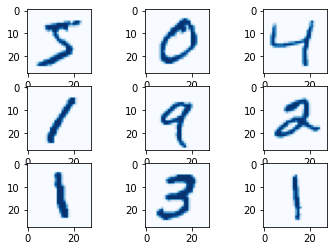

In [8]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('Blues'))
pyplot.show()

### Data Preprocessing 

In [4]:
num_classes = 10
input_shape = (28, 28, 1)
train_X, test_X = train_X.astype("float32") / 255, test_X.astype("float32") / 255

train_X, test_X = np.expand_dims(train_X, -1), np.expand_dims(test_X, -1)
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

## Build the model 

In [6]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

## Compile  the model

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fit the model 

In [8]:
history = model.fit(train_X, train_y, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1695 - accuracy: 0.9475
Epoch 2/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0641 - accuracy: 0.9800
Epoch 3/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 4/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 5/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0356 - accuracy: 0.9882
Epoch 6/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0327 - accuracy: 0.9889
Epoch 7/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0292 - accuracy: 0.9904
Epoch 8/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0273 - accuracy: 0.9909
Epoch 9/15
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 10/15
1875/1875 [==============================] - 45s 24m

In [20]:
 # save the model
model.save('best_cnn.h3')

INFO:tensorflow:Assets written to: best_cnn.h3\assets


### Plotting the curve

Text(0.5, 1.0, 'Accuracy & Loss')

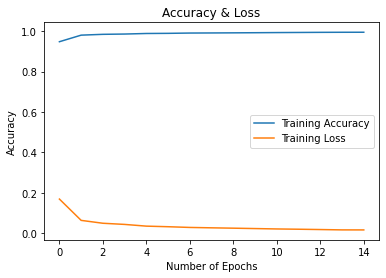

In [9]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy & Loss")

**Model Accuracy**

In [10]:
score = model.evaluate(test_X, test_y)
print("Accuracy:", score[1])
print("Loss:", score[0])

313/313 [==============================] - 2s 6ms/step - loss: 0.0293 - accuracy: 0.9924
Accuracy: 0.9923999905586243
Loss: 0.029347211122512817


In [11]:
print(f"Best Accuracy Achieved by Model: {max(history.history['accuracy'])}")

Best Accuracy Achieved by Model: 0.9943833351135254


In [12]:
y_predicted = model.predict(test_X, verbose=1)
y_predicted = np.argmax(y_predicted, axis=1)

313/313 [==============================] - 2s 5ms/step


In [13]:
y_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
# Predicting the Test set results
classes = [0,1,2,3,4,5,6,7,8,9]
y_prediction = label_binarize(y_predicted, classes=classes)
test_label   = label_binarize(test_y, classes=classes)
conf_mat = classification_report(test_label,y_prediction)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [15]:
# Loading the model
cnn = load_model('best_cnn.h3')
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

**Confusion Matrix**

Text(114.0, 0.5, 'Truth')

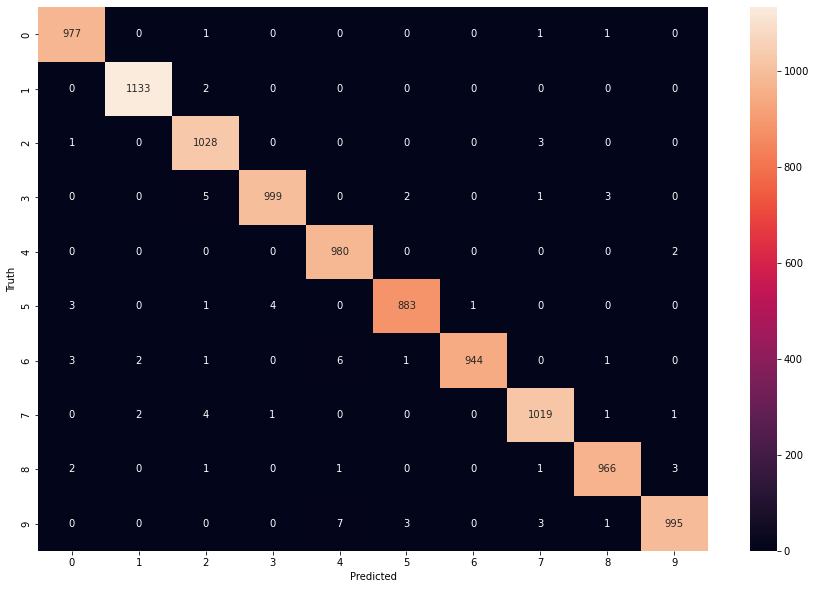

In [18]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_predicted)
plt.figure(figsize = (15,10))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Predict class of each particular

In [19]:
def predict_class(dataset): # predicting the class
    return np.argmax(cnn.predict(np.reshape(dataset,(-1, 28, 28, 1))), axis=1)

Probability of each particular

In [20]:
def evaluate(dataset):
    # Loading the model
    cnn = load_model('best_cnn.h3')
    
    # calculating fitness value
    probability = np.max(np.round(cnn.predict(np.reshape(dataset,(-1, 28, 28, 1))),30), axis=-1)
    
    #fitness = np.max(np.round(best_cnn.predict(imagedataset),30))
    return probability

Fitness on each particular

In [21]:
# Fitness function
def fitness(predict_image, target_image_):          # score_predict, target_score_
    
    image        = predict_class(predict_image)
    target_image = target_image_       
    score        = evaluate(predict_image)  
    target_score = np.full((len(target_image_)), 1) # each estimation must have a probability of one

    fitness_value = abs(-(0.0000005*np.linalg.norm(image - target_image) + (target_score - score)))
    return fitness_value

## <span style='background:orange'> Selection  </span> 
- Fitness Proportion Selection(Fps)
- Tournament Selection

### Fitness Proportion Selection(FPS) 
Fitness proportional selection (FPS), also known as roulette wheel selection, is a genetic operator that is employed in genetic algorithms to choose potentially helpful recombination solutions. The fitness function assigns fitness to feasible solutions or chromosomes in fitness proportional selection, as in all selection procedures.

In [22]:
def fitness_pro_select (population, labels):

    fitness_value = fitness(population, labels)
    total_fit  = np.sum(fitness_value)
    print("Total fitness on current generation :", total_fit)
    
    # Get a 'position' on the wheel
    spin = uniform(0, total_fit)
       
    # Find individual in the position of wheel
    position = 0
    for individual in (range(0,len(fitness_value))):
        position += fitness_value[individual]
        if position > spin:
            return individual  

### Tournament Selection
In a genetic algorithm, tournament selection is a way of selecting one individual from a population of people. Several "tournaments" are held among a few individuals (or "chromosomes") chosen at random from the population.

In [23]:
def tournament_selection(population, labels, size=20, optimization_problem='max'):
    
    # Select individuals based on the tournament size
    tournament_sample = sample(range(len(population)), size)
    
    # Selecting only individuals and corresponded labels on the tournament sample
    tournament_individuals = [population[i] for i,v in enumerate(tournament_sample) if population[i] is not None] 
    tournament_labels = [labels[i] for i,v in enumerate(tournament_sample) if labels[i] is not None]

    if optimization_problem == 'max':
        
        #Find the position of the individuals with best fitness on the tournament_individuals
        winner =np.argmax(fitness(tournament_individuals,tournament_labels))
        
        # Find the winner's corresponding index in the database
        winner_position = tournament_sample[winner]
        
        # The total fitness on the tournament_sample
        print("The total fitness on the tournament_sample:", np.sum(fitness(tournament_individuals,tournament_labels)))
        return winner_position
    
    elif optimization_problem == 'min':
        raise NotImplementedError

## <span style='background:orange'> Crossover  </span>

1. Single Point Crossover
2. Cycle Crossover
3. Partially Mapped Crossover (PMX)
4. Arithmetic Crossover

### Single Point Crossover
A 'crossover point' is chosen at random on both parents' chromosomes. The two parent chromosomes swap bits to the right of that location. This produces two offspring, each of whom carries some genetic material from both parents.

In [24]:
def single_point_co(p1, p2, y1, y2):
    # Crossover point of random lenght of parent
    co_point = randint(1, len(p1)-1)

    offspring1 = p1[:co_point] + p2[co_point:]
    offspring2 = p2[:co_point] + p1[co_point:]
    
    y1,y2 = y1,y2
    
    return offspring1, offspring2, y1, y2

### Cycle Crossover
This technique is used to create offspring in such a way that each bit has its position comes from one of the parents.

In [22]:
def cycle_co(p1, p2,  y1, y2):
    # Offspring placeholders - None values make it easy to debug for errors
    offspring1 = [None] * len(p1)
    offspring2 = [None] * len(p1)
    
    # While there are still None values in offspring, get the first index of None and start a "cycle" according to 
    # the cycle crossover method
    
    while None in offspring1:
        index = offspring1.index(None)
        # alternate parents between cycles beginning on second cycle
        if index != 0:
            p1, p2 = p2, p1
        val1 = p1[index]
        val2 = p2[index]

        while val1 != val2:
            offspring1[index] = p1[index]
            offspring2[index] = p2[index]
            val2 = p2[index]
            index = p1.index(val2)
            
        # Fill in each offspring if the last values have the same index.
        offspring1[index] = p1[index]
        offspring2[index] = p2[index]
    y1,y2 = y1,y2
    return offspring1, offspring2, y1, y2

### Partially Mapped Crossover (PMX) 
This crossover generates offspring from one chromosomes into other parent while retaining original order.

In [1]:
def pmx_co(p1, p2, y1, y2):

    co_points = sample(range(len(p1)), 2)
    co_points.sort()

    def PMX(x, y):
        o = [None] * len(x)

        o[co_points[0]:co_points[1]] = x[co_points[0]:co_points[1]]

        z = set(y[co_points[0]:co_points[1]]) - set(x[co_points[0]:co_points[1]])

        for i in z:
            temp = i
            index = y.index(x[y.index(temp)])
            while o[index] is not None:
                temp = index
                index = y.index(x[temp])
            o[index] = i

        while None in o:
            index = o.index(None)
            o[index] = y[index]
        return o

    o1, o2 = PMX(p1, p2), PMX(p2, p1)
    y1, y2 = y1, y2
    return o1, o2, y1, y2

### Arithmetic Crossover
A crossover operator that produces two new offspring by linearly combining two parent chromosome vectors according to the following equations: 
- Offspring1 = a * Parent1 + (1- a)  * Parent2 
- Offspring2 = (1 - a) * Parent1 + a * Parent2 

In [25]:
def arithmetic_co(p1, p2, y1, y2):
    # Offspring placeholders - None values make it easy to debug for errors
    offspring1 = [None] * len(p1)
    offspring2 = [None] * len(p1)
    
    # Set a value for alpha between 0 and 1
    alpha = uniform(0,1)
    
    # Take weighted sum of two parents, invert alpha for second offspring
    for i in range(len(p1)):
        offspring1[i] = p1[i] * alpha + (1 - alpha) * p2[i]
        offspring2[i] = p2[i] * alpha + (1 - alpha) * p1[i]

    y1,y2 = y1,y2
    return offspring1, offspring2, y1, y2

## <span style='background:orange'> Mutation  </span>
1. Binary Mutation
2. Swap Mutation
3. Inversion Mutation

### Binary Mutation 
For binary mutation the flipping of variable values in every variable has only two states.

In [2]:
def binary_mutation(individual):
    mut_point = randint(0, len(individual) - 1)

    if individual[mut_point] == 0:
        individual[mut_point] = 1
    elif individual[mut_point] == 1:
        individual[mut_point] = 0
    else:
        raise Exception(
            f"Trying to do binary mutation on {individual}. But it's not binary.")

    return individual

### Swap Mutation
It consists of exchanging two arguments of a node and a shrink mutation that generates a new individual from a parent’s subtree.

In [26]:
def swap_mutation(individual):            
    mutation_point = sample(range(len(individual)), 2)      # Get two mutation points
    #swap them
    individual[mutation_point[0]], individual[mutation_point[1]] = individual[mutation_point[1]], individual[mutation_point[0]]
    return individual

###  Inversion Mutation
It happens when a part of the chromosome breaks off, flips around, and becomes reattached.

In [27]:
def inversion_mutation(individual):
    mutation_point = sample(range(len(individual)), 2)      # Start and end position of the substring
    mutation_point.sort()                                   # Sort the list
    # swap them
    individual[mutation_point[0]:mutation_point[1]] = list(individual[mutation_point[0]:mutation_point[1]])[::-1]
    return individual

# <span style='background: skyblue'> Genetic Algorithm  </span>

In [28]:
def evolve(x_dataset, y_dataset, numb_pics, predict_class_func, gens, selection, crossover,cross_prob, 
           mutation, mutation_prob, model, fitness_function, optimization_problem):

    if optimization_problem == 'max':
        print("Dear user, the genetic algorithm will evolve according to your choices:")
        print(numb_pics, "random pictures; ") 
        print(gens," Generations; ")
        print("Be patient this can take time")

        # Selecting randomly the position of the images
        random_index = sample(list(range(0,len(x_dataset))), numb_pics)
        print("The random positions selected of the individuals are", random_index)

        # assign the images corresponding to the positions above
        x_test1 = [x_dataset[i] for i,v in enumerate(random_index) if x_dataset[i] is not None] 
        y_test1 = [y_dataset[i] for i,v in enumerate(random_index) if y_dataset[i] is not None]

        # Initializing lists
        accuracyscore = []
        f1score = [] 
        recallscore = [] 
        precisionscore = []
        total_fitness = [] 
 
        accuracy = accuracy_score(predict_class_func(x_test1), y_test1)
        f1 = f1_score(predict_class_func(x_test1), y_test1, average='weighted')
        recall = recall_score(predict_class_func(x_test1), y_test1, average='weighted')
        precision = precision_score(predict_class_func(x_test1), y_test1, average='weighted')
        total_fitness = np.sum(fitness(x_test1, y_test1))

        accuracy.append(accuracy)  
        f1score.append(f1)
        recallscore.append(recall)   
        precisionscore.append(precision)
        total_fitness.append(total_fitness) 

        for i in tqdm(range(gens)): #
            print(f"Generation Nº: {i}") # Printing the current generation
            conta = 0
            new_pop = []
            y_orig = []

            while(len(new_pop)< numb_pics): # Apply randomily crossover and mutation until the population reach 10000 individuals
                conta += 1
                selected=[]
                for i in (range(2)):
                    a= type_Selection(x_test1, y_test1)
                    selected.append(accuracy)

                    if len(selected)==2: # The crossover and mutation is going to applyed after select randomily             
                        if random() < cross_prob:#
                            off1, off2, y1, y2 type_Crossover(list(x_test1[selected[0]]), list(x_test1[selected[1]]), y_test1[selected[0]], y_test1[selected[1]])
                        else:
                            off1, off2, y1, y2=list(x_test1[selected[0]]), list(x_test1[selected[1]]), y_test1[selected[0]], y_test1[selected[1]]

                        # Applying the randomly the swap mutation on offsprings
                            if random() < mutation_prob:
                                off1 = mutation(list(off1))
                            if random() < mutation_prob:    
                                off2 = mutation(list(off2))
                            new_pop.append(off1)
                            y_orig.append(y1)

                            if len(new_pop) < 50: # If the population does not reach 10000 continue appending the new individuals
                                new_pop.append(off2)
                                y_orig.append(y2)


                            if  len(new_pop)==numb_pics:  # If the population reach 10000 calculate the scores above
                                y_pred_old_pop = np.argmax(model.predict(np.reshape(x_test1,(-1, 28, 28, 1))), axis=1)
                                y_pred_new_pop = np.argmax(model.predict(np.reshape(new_pop,(-1, 28, 28, 1))), axis=1)
                                labels = [0,1,2,3,4,5,6,7,8,9] #labels for the confusion matrix
                                y_pred_old_pop= label_binarize(y_pred_old_pop, classes = labels)
                                y_pred_new_pop = label_binarize(y_pred_new_pop, classes = labels)
                                orig_true_labels_old_pop = label_binarize(y_test1, classes = labels)
                                orig_true_labels_new_pop = label_binarize(y_orig, classes = labels)
                                a = accuracy_score(orig_true_labels_new_pop, y_pred_new_pop)
                                f = f1_score(orig_true_labels_new_pop, y_pred_new_pop,average='weighted')
                                r = recall_score(orig_true_labels_new_pop, y_pred_new_pop, average='weighted')
                                p = precision_score(orig_true_labels_new_pop, y_pred_new_pop, average='weighted')

                                accuracy.append(accuracy)  
                                f1score.append(f1)
                                recallscore.append(recall)
                                precisionscore.append(precision)

                                acc_prev_pop = accuracy_score(orig_true_labels_old_pop, y_pred_old_pop)
                                acc_new_pop  = accuracy_score(orig_true_labels_new_pop, y_pred_new_pop)

                                print(f"The average score of the new population = {acc_new_pop}, The average score of the previous population = {acc_prev_pop}")
                                x_test1 = new_pop
                                y_test1 = y_orig

                                fit_sum = np.sum(fitness_function(x_test1, y_test1))
                                total_fitness.append(fit_sum)
                            else:
                                pass

        return accuracy, f1score, recallscore, precisionscore, total_fitness, x_test1, y_test1

## **Stage 1 : Fitness proportion selection, Single point Crossover, Swap Mutation**

In [31]:
accuracy_1, f1score_1, recallscore_1, precisionscore_1, total_fitness_1, x_test1_1, y_test1_1 = evolve(x_dataset = test_X, 
                  y_dataset = test_y, numb_pics = 1000, predict_class_func = predict_class, gens = 5, 
                  selection = fitness_pro_select, crossover = single_point_co, cross_prob = 0.6, 
                  mutation = swap_mutation, mutation_prob = 0.5, model = cnn, fitness_function = fitness,
                  optimization_problem = 'max')

Dear user, the genetic algorithm will evolve according to your choices:
1000 random pictures; 
5  Generations; 
Be patient this can take time
The random positions selected of the individuals are [1402, 3432, 7256, 3383, 6131, 4827, 4799, 8032, 675, 3234, 2020, 6741, 2737, 9668, 291, 923, 3300, 8122, 8350, 1965, 2906, 1924, 9683, 7149, 7573, 4718, 6802, 7560, 4564, 3032, 4340, 2333, 4147, 4427, 3893, 5113, 9191, 6801, 8255, 3629, 4590, 8510, 7445, 5485, 9639, 3195, 4278, 7383, 7687, 8670, 4245, 4977, 9657, 9569, 570, 9350, 4347, 3255, 8444, 4939, 6923, 2979, 1288, 2698, 3584, 712, 1998, 1521, 7400, 3433, 7907, 8760, 1909, 8385, 4166, 4143, 8712, 5306, 8276, 539, 4081, 4122, 4065, 6423, 9483, 7517, 40, 428, 7606, 9622, 989, 6539, 6058, 2263, 9222, 7860, 8565, 6709, 1602, 7100, 8223, 9916, 3559, 5271, 5197, 6125, 1576, 5606, 9645, 7706, 8068, 5886, 6330, 1057, 2080, 3426, 7704, 3801, 7216, 6606, 7803, 8284, 9807, 8172, 8942, 5703, 5085, 5506, 4115, 7633, 1954, 4912, 5867, 9776, 2493, 6677

  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
The position of two parents chosen:  [903, 984]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.7840232890164
The position of two parents chosen:  [131, 992]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.7840232890164
The position of two parents chosen:  [672, 358]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.7840232890164
The position of two parents chosen:  [848, 290]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.7840232890164
The position of two parents chosen:  [561, 30]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.7840232890164
The position of two parents chosen:  [62, 272]
Total fitness on current generation : 579.7840232890164
Total fitness on current generation : 579.78402

#### Performance of model 

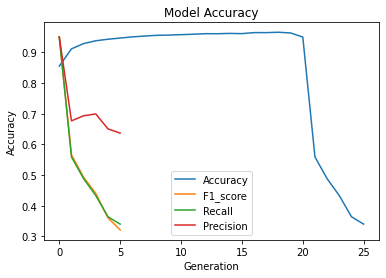

In [32]:
import matplotlib.pyplot as plt
plt.plot(accuracy_1)
plt.plot(f1score_1)
plt.plot(recallscore_1)
plt.plot(precisionscore_1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Generation")
plt.legend(["Accuracy","F1_score","Recall","Precision"])
plt.show()

#### Confusion Matrix 

In [33]:
# Predicting the Test set results
pred_y1 = np.argmax(cnn.predict(np.reshape(x_test1_1,(-1, 28, 28, 1))), axis=1)

pred_y1 = label_binarize(pred_y1, classes = labels)

test_label = label_binarize(y_test1_1, classes = labels)

#classification report
conf1 = classification_report(test_label, pred_y1)
print(conf1)

              precision    recall  f1-score   support

           0       0.60      0.03      0.06        95
           1       1.00      1.00      1.00         3
           2       0.60      0.29      0.39       120
           3       0.36      0.09      0.15       170
           4       0.00      0.00      0.00         1
           5       0.98      0.58      0.73        98
           6       0.98      0.21      0.35       260
           7       0.69      0.12      0.20        76
           8       0.21      0.95      0.34       158
           9       0.38      0.63      0.47        19

   micro avg       0.34      0.34      0.34      1000
   macro avg       0.58      0.39      0.37      1000
weighted avg       0.64      0.34      0.32      1000
 samples avg       0.34      0.34      0.34      1000



## **Stage 2 : Tournament Selection, Arithmetic Crossover, Swap mutation**

In [44]:
accuracy_2, f1score_2, recallscore_2, precisionscore_2, total_fitness_2, x_test1_2, y_test1_2= \
evolve(x_dataset=test_X, y_dataset = test_y, numb_pics = 1000, predict_class_func = predict_class, gens = 5, 
                  selection =tournament_selection, crossover = arithmetic_co, cross_prob=0.6, 
                  mutation = swap_mutation, mutation_prob = 0.5, model = cnn, 
                  fitness_function = fitness,optimization_problem = 'max')

Dear user, the genetic algorithm will evolve according to your choices:
1000 random pictures; 
5  Generations; 
Be patient this can take time
The random positions selected of the individuals are [9239, 3900, 6124, 6550, 2922, 4299, 1185, 8722, 6366, 6055, 6492, 736, 157, 4705, 4970, 3190, 2204, 8508, 6329, 2070, 4547, 1387, 6919, 6383, 3225, 3616, 1150, 6711, 2962, 6701, 8801, 4838, 4685, 2513, 8648, 8931, 5425, 35, 6425, 2421, 8004, 1585, 4122, 980, 5023, 4550, 902, 7319, 2426, 2213, 5721, 5638, 7870, 8090, 7089, 6410, 3695, 4773, 7029, 7063, 7896, 7999, 4359, 5307, 6805, 7864, 5077, 1188, 2967, 7948, 7386, 802, 4425, 9115, 4007, 6867, 9136, 9219, 5187, 7690, 1024, 3030, 3388, 8210, 5764, 2046, 5262, 6628, 4029, 7191, 1112, 9601, 1890, 4046, 9727, 6251, 3522, 9169, 6271, 5364, 1508, 3269, 4415, 1865, 1901, 2327, 4164, 3229, 9521, 5532, 4973, 7418, 3797, 8773, 7321, 1652, 3089, 8359, 4789, 6605, 8856, 9432, 5918, 1255, 5649, 5615, 4690, 8373, 1201, 2398, 6952, 1191, 3683, 1568, 8594, 4

  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
The position of two parents chosen:  [573, 683]
The total fitness on the tournament_sample: 0.9187372293712677
The total fitness on the tournament_sample: 0.9187372293712677
The position of two parents chosen:  [285, 453]
The total fitness on the tournament_sample: 0.9187372293712677
The total fitness on the tournament_sample: 0.9187372293712677
The position of two parents chosen:  [105, 934]
The total fitness on the tournament_sample: 0.9187372293712677
The total fitness on the tournament_sample: 0.9187372293712677
The position of two parents chosen:  [589, 856]
The total fitness on the tournament_sample: 0.9187372293712677
The total fitness on the tournament_sample: 0.9187372293712677
The position of two parents chosen:  [422, 432]
The total fitness on the tournament_sample: 0.9187372293712677
The total fitness on the tournament_sample: 0.9187372293712677
The position of two parents chosen:  [10, 139]
The total fitness on the tournam

#### Performance of model

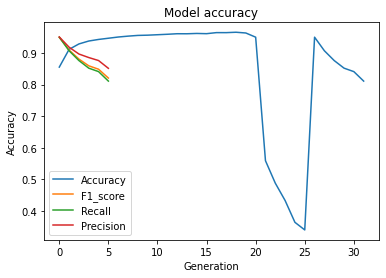

In [45]:
plt.plot(accuracy_2)
plt.plot(f1score_2)
plt.plot(recallscore_2)
plt.plot(precisionscore_2)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Generation")
plt.legend(["Accuracy","F1_score","Recall","Precision"])
plt.show()

#### Confusion Matrix  

In [47]:
# Predicting the Test set results
pred_y2 = np.argmax(cnn.predict(np.reshape(x_test1_2,(-1, 28, 28, 1))), axis=1)

pred_y2 = label_binarize(pred_y2, classes=labels)

test_label = label_binarize(y_test1_2, classes=labels)

#classification report
conf2 = classification_report(test_label, pred_y2)
print(conf2)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        84
           1       1.00      0.94      0.97       146
           2       0.88      0.76      0.81       133
           3       0.69      0.97      0.80        93
           4       0.94      0.78      0.85        80
           5       0.90      0.72      0.80       111
           6       0.85      0.85      0.85        88
           7       0.90      0.81      0.85        98
           8       0.41      0.82      0.55        65
           9       0.77      0.70      0.73       102

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.83      0.81      0.81      1000
weighted avg       0.85      0.81      0.82      1000
 samples avg       0.81      0.81      0.81      1000



## **Stage 3 : Tournament Selection, Single point crossover, Inversion Mutation**

In [29]:
accuracy_3, f1score_3, recallscore_3, precisionscore_3, total_fitness_3, x_test1_3, y_test1_3= \
evolve(x_dataset = test_X, y_dataset= test_y, numb_pics=1000, predict_class_func = predict_class, 
       gens = 5, selection = tournament_selection, crossover= single_point_co, 
       cross_prob=0.6, mutation= inversion_mutation, mutation_prob=0.5,model = cnn, 
       fitness_function = fitness, optimization_problem='max')

Dear user, the genetic algorithm will evolve according to your choices:
1000 random pictures; 
5  Generations; 
Be patient this can take time
The random positions selected of the individuals are [3514, 7311, 1750, 2466, 1503, 8376, 0, 9244, 8857, 4797, 6177, 3387, 6017, 8093, 3449, 3748, 5415, 9480, 7646, 6303, 2511, 1845, 6937, 767, 534, 8108, 3642, 5431, 1912, 7604, 3755, 1137, 5114, 4948, 2498, 5852, 2379, 3968, 6056, 7061, 2609, 8684, 3345, 476, 5001, 5003, 8962, 2965, 4925, 4643, 9323, 35, 7513, 6694, 8458, 9619, 457, 556, 3294, 5397, 6032, 391, 3240, 5407, 3146, 4013, 9021, 930, 5059, 3018, 6304, 1478, 7983, 6996, 8121, 8937, 8578, 6528, 2008, 4710, 3076, 9285, 1158, 5893, 2521, 2982, 9749, 3039, 8847, 2186, 7698, 1759, 945, 709, 4184, 361, 1653, 323, 2475, 6593, 9962, 2418, 6758, 2534, 8626, 1195, 714, 9210, 4901, 9029, 3540, 7982, 769, 9612, 8175, 1631, 7418, 2598, 6511, 2015, 2412, 8260, 9225, 9539, 6074, 1388, 474, 6604, 2054, 3691, 9181, 5124, 5603, 917, 5492, 3115, 5052, 85

  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
The position of two parents chosen:  [135, 591]
The total fitness on the tournament_sample: 1.506039824134399
The total fitness on the tournament_sample: 1.506039824134399
The position of two parents chosen:  [38, 468]
The total fitness on the tournament_sample: 1.506039824134399
The total fitness on the tournament_sample: 1.506039824134399
The position of two parents chosen:  [522, 501]
The total fitness on the tournament_sample: 1.506039824134399
The total fitness on the tournament_sample: 1.506039824134399
The position of two parents chosen:  [84, 233]
The total fitness on the tournament_sample: 1.506039824134399
The total fitness on the tournament_sample: 1.506039824134399
The position of two parents chosen:  [820, 163]
The total fitness on the tournament_sample: 1.506039824134399
The total fitness on the tournament_sample: 1.506039824134399
The position of two parents chosen:  [406, 111]
The total fitness on the tournament_sample:

#### Performance of model 

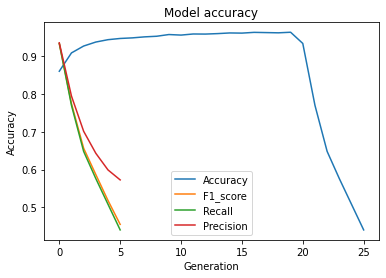

In [30]:
plt.plot(accuracy_3)
plt.plot(f1score_3)
plt.plot(recallscore_3)
plt.plot(precisionscore_3)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Generation")
plt.legend(["Accuracy","F1_score","Recall","Precision"])
plt.show()

#### Confusion Matrix  

In [41]:
pred_y3 = np.argmax(cnn.predict(np.reshape(x_test1_3,(-1, 28, 28, 1))), axis=1)

pred_y3 = label_binarize(pred_y3, classes = labels)

test_label3 = label_binarize(y_test1_3, classes = labels)

#classification report
conf3 = classification_report(test_label3,pred_y3)
print(conf3)

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        56
           1       0.90      0.70      0.78       165
           2       0.31      0.55      0.39       120
           3       0.28      0.56      0.37        78
           4       0.79      0.20      0.32       147
           5       0.57      0.39      0.46       110
           6       0.52      0.41      0.46       105
           7       0.56      0.26      0.35        89
           8       0.17      0.48      0.25        50
           9       0.30      0.36      0.33        80

   micro avg       0.44      0.44      0.44      1000
   macro avg       0.53      0.43      0.43      1000
weighted avg       0.57      0.44      0.45      1000
 samples avg       0.44      0.44      0.44      1000



## **Stage 4: Fitness proportion selection, Arithmetic crossover, Inversion Mutation**

In [44]:
accuracy_4, f1score_4, recallscore_4, precisionscore_4, total_fitness_4, x_test1_4, y_test1_4= \
evolve(x_dataset = test_X, y_dataset = test_y, numb_pics=1000, predict_class_func = predict_class, gens = 5, 
       selection = fitness_pro_select,crossover = arithmetic_co, cross_prob = 0.6, 
       mutation= inversion_mutation, mutation_prob = 0.5, model=cnn, 
       fitness_function = fitness,optimization_problem = 'max')

Dear user, the genetic algorithm will evolve according to your choices:
1000 random pictures; 
5  Generations; 
Be patient this can take time
The random positions selected of the individuals are [5610, 4978, 3055, 5647, 1723, 5692, 7214, 6085, 534, 2753, 3183, 9435, 1175, 1351, 9062, 9952, 7639, 6656, 7994, 5403, 5413, 455, 6468, 5124, 4777, 9798, 8441, 7260, 557, 7960, 2588, 8855, 565, 4778, 8945, 8902, 6159, 6940, 7546, 8239, 22, 1210, 931, 9568, 1679, 6845, 9652, 956, 2434, 8991, 7786, 8630, 1257, 5013, 5918, 4702, 9885, 4714, 9502, 7502, 1834, 4118, 6000, 9540, 382, 8921, 2074, 2674, 4920, 9786, 4225, 5429, 6814, 6703, 9881, 8680, 4932, 7423, 7767, 7173, 1887, 9076, 3360, 9036, 6689, 1426, 7111, 6615, 9424, 3363, 3203, 124, 3415, 1865, 8873, 5728, 6177, 364, 4759, 3444, 463, 9649, 9229, 487, 19, 2774, 6040, 4380, 328, 8140, 9801, 5092, 8556, 4782, 3378, 9740, 9154, 2821, 1631, 7779, 9063, 2526, 833, 3264, 6132, 7864, 2527, 1131, 5665, 5181, 2121, 2813, 8965, 8129, 4060, 1632, 5628,

  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
The position of two parents chosen:  [568, 335]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507758970257
The position of two parents chosen:  [449, 997]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507758970257
The position of two parents chosen:  [393, 293]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507758970257
The position of two parents chosen:  [752, 493]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507758970257
The position of two parents chosen:  [556, 470]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507758970257
The position of two parents chosen:  [470, 43]
Total fitness on current generation : 475.3507758970257
Total fitness on current generation : 475.3507

#### Performance of model 

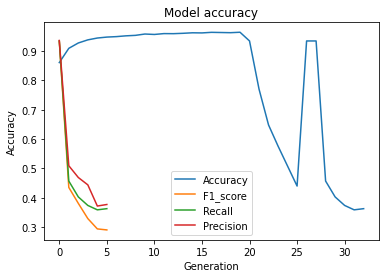

In [45]:
plt.plot(accuracy_4)
plt.plot(f1score_4)
plt.plot(recallscore_4)
plt.plot(precisionscore_4)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Generation")
plt.legend(["Accuracy","F1_score","Recall","Precision"])
plt.show()

#### Confusion Matrix 

In [46]:
pred_y4 = np.argmax(cnn.predict(np.reshape(x_test1_4,(-1, 28, 28, 1))), axis=1)

pred_y4 = label_binarize(pred_y4, classes = labels)

test_label4 = label_binarize(y_test1_4, classes = labels)

#classification report
conf4 = classification_report(test_label4,pred_y4)
print(conf4)

              precision    recall  f1-score   support

           0       0.29      0.07      0.12        27
           1       0.20      0.08      0.11        25
           2       0.09      0.57      0.15        14
           3       0.25      0.12      0.16       124
           4       0.33      0.07      0.12        57
           5       0.27      0.09      0.13        80
           6       0.48      0.05      0.09       214
           7       0.62      0.21      0.31        38
           8       0.42      0.81      0.56       354
           9       0.24      0.28      0.26        67

   micro avg       0.36      0.36      0.36      1000
   macro avg       0.32      0.24      0.20      1000
weighted avg       0.38      0.36      0.29      1000
 samples avg       0.36      0.36      0.36      1000



**Thank you :)**